In [ ]:

!pip install kaggle

In [ ]:
kaggle='/content/kaggle.json'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.42GB/s]


In [ ]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = "datasets"
os.makedirs(extract_folder, exist_ok= True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [ ]:
data_0 = os.listdir('/content/datasets/0')
data_1 = os.listdir('/content/datasets/1')
data_2 = os.listdir('/content/datasets/2')
data_3 = os.listdir('/content/datasets/3')
data_4 = os.listdir('/content/datasets/4')
data_5 = os.listdir('/content/datasets/5')
data_6 = os.listdir('/content/datasets/6')
data_7 = os.listdir('/content/datasets/7')
data_8 = os.listdir('/content/datasets/8')
data_9 = os.listdir('/content/datasets/9')

In [ ]:
import os

for i in range(10):
    folder = f"/content/datasets/{i}"
    print(f"Digit {i} : {len(os.listdir(folder))} images")


Digit 0 : 2236 images
Digit 1 : 2241 images
Digit 2 : 2233 images
Digit 3 : 2202 images
Digit 4 : 2179 images
Digit 5 : 2126 images
Digit 6 : 2121 images
Digit 7 : 2116 images
Digit 8 : 2085 images
Digit 9 : 2016 images


In [ ]:
import cv2
import numpy as np

X = []
y = []

for digit in range(10):
    folder = f"/content/datasets/{digit}"
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))   # standarisasi ukuran
        img = img / 255.0                 # normalisasi

        X.append(img.flatten())           # 28x28 → 784
        y.append(digit)

X = np.array(X)
y = np.array(y)

X.shape, y.shape


((21555, 784), (21555,))

In [ ]:
import pandas as pd

df = pd.DataFrame(X)
df['label'] = y

df.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.996078,0.992157,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.996078,0.984314,0.980392,0.972549,0.262745,0
1,0.984314,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.996078,0.984314,0.925490,0.968627,0.952941,0
2,0.952941,0.976471,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992157,0.972549,0
4,0.992157,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,0.972549,0.964706,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21555 entries, 0 to 21554
Columns: 785 entries, 0 to label
dtypes: float64(784), int64(1)
memory usage: 129.1 MB


In [ ]:
df.describe()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,21555.000000,21555.000000,21555.000000,21555.000000,21555.000000,21555.000000,21555.000000,21555.000000,21555.000000,21555.000000,...,21555.000000,21555.000000,21555.000000,21555.000000,21555.000000,21555.000000,21555.000000,21555.000000,21555.000000,21555.000000
mean,0.945490,0.976351,0.985605,0.988718,0.989670,0.990068,0.990160,0.990138,0.990044,0.990037,...,0.989985,0.990287,0.990742,0.991197,0.991324,0.991125,0.989312,0.982598,0.932000,4.408304
std,0.130780,0.074281,0.051909,0.043464,0.041786,0.041392,0.041667,0.041921,0.042455,0.042819,...,0.047777,0.046534,0.045046,0.042015,0.039926,0.038408,0.041106,0.057947,0.170187,2.864833
min,0.011765,0.007843,0.011765,0.023529,0.019608,0.000000,0.007843,0.007843,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.003922,0.011765,0.015686,0.011765,0.000000,0.000000,0.000000
25%,0.968627,0.984314,0.988235,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,0.988235,0.972549,2.000000
50%,0.988235,0.992157,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.988235,4.000000
75%,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [ ]:
df.isnull().sum().head()


,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
X = df.drop('label', axis=1)
y = df['label']



In [ ]:
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y, num_classes=10)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1037 - loss: 2.3523 - val_accuracy: 0.1050 - val_loss: 2.3029
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1085 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3035
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1067 - loss: 2.3015 - val_accuracy: 0.1050 - val_loss: 2.3035
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1065 - loss: 2.3017 - val_accuracy: 0.1050 - val_loss: 2.3035
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1078 - loss: 2.3015 - val_accuracy: 0.1050 - val_loss: 2.3034
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1088 - loss: 2.3018 - val_accuracy: 0.1050 - val_loss: 2.3036


In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0906 - loss: 2.3031
Test Accuracy: 0.09093017876148224


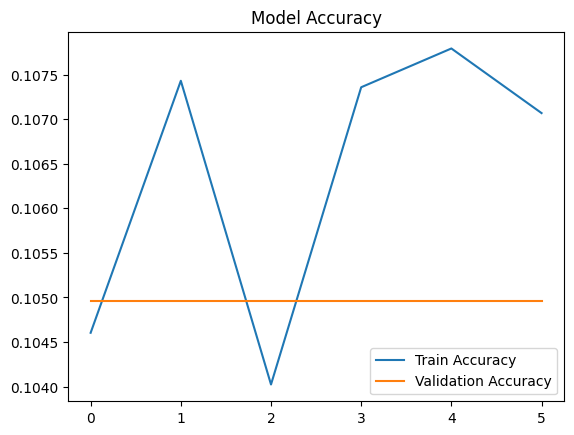

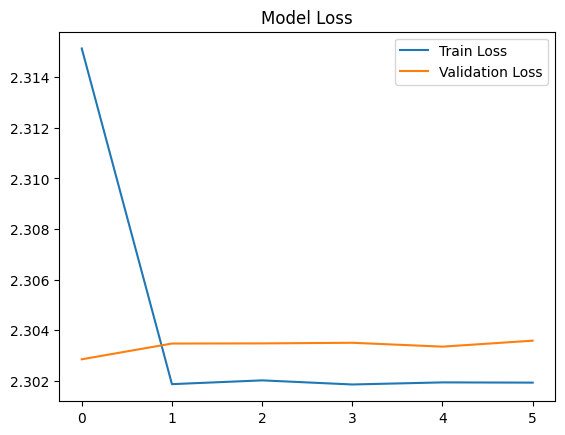

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()
